In [1]:
import os
from pathlib import Path
import anndata as an
import numpy as np
import pandas as pd
import deside
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from deside.utility import check_dir, set_fig_style, print_df, get_ccc, non_log2log_cpm, non_log2cpm, read_cancer_purity
from deside.decon_cf import DeSide
from deside.utility.read_file import read_gene_set, ReadH5AD
from deside.plot import plot_corr_two_columns
set_fig_style(font_family='Arial', font_size=8)

2024-07-16 18:54:44.522568: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
simu_bulk_nbase5_obj = ReadH5AD('../../datasets/simulated_bulk_cell_dataset_subtypes_all_range/segment_12ds_no_filtering_n_base5_median_gep/simu_bulk_exp_Mixed_N1K_segment_without_filtering_log2cpm1p.h5ad')
simu_bulk_nbase5 = simu_bulk_nbase5_obj.get_df(convert_to_tpm=True)
print(simu_bulk_nbase5.shape)
simu_bulk_nbase5.head(2)

(1000, 17834)


,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADAT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
s_segment_0_1,19.219999,0.0,941.111023,0.046,10.054,0.0,0.332,0.045,0.000,0.0,...,0.204,0.159,9.088,0.000,0.031,0.148,8.049,84.541000,0.385,9.175
s_segment_0_10,6.575000,0.0,0.027000,0.001,9.679,0.0,7.850,3.780,3.764,0.0,...,3.619,9.107,0.000,3.211,0.032,0.002,4.556,48.617001,0.269,4.632


In [3]:
simu_bulk_nbase10_obj = ReadH5AD('../../datasets/simulated_bulk_cell_dataset_subtypes_all_range/segment_12ds_no_filtering_n_base10_median_gep/simu_bulk_exp_Mixed_N1K_segment_without_filtering_log2cpm1p.h5ad')
simu_bulk_nbase10 = simu_bulk_nbase10_obj.get_df(convert_to_tpm=True)
print(simu_bulk_nbase10.shape)
simu_bulk_nbase10.head(2)

(1000, 17834)


,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADAT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
s_segment_0_1,138.436005,0.000,5.123000,0.000,0.359,0.0,0.188,37.637001,0.0,35.755001,...,0.122,0.013,1.032,1.928,0.840,0.003,0.073000,30.395000,2.122,0.065
s_segment_0_10,45.509998,0.011,343.631989,0.014,1.235,0.0,10.401,0.125000,0.0,0.000000,...,2.761,10.429,0.000,1.137,7.704,0.022,27.415001,120.351997,33.430,9.203


In [4]:
simu_bulk_nbase20_obj = ReadH5AD('../../datasets/simulated_bulk_cell_dataset_subtypes_all_range/segment_12ds_no_filtering_n_base20_median_gep/simu_bulk_exp_Mixed_N1K_segment_without_filtering_log2cpm1p.h5ad')
simu_bulk_nbase20 = simu_bulk_nbase20_obj.get_df(convert_to_tpm=True)
print(simu_bulk_nbase20.shape)
simu_bulk_nbase20.head(2)

(1000, 17834)


,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADAT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
s_segment_0_1,73.764000,0.0,81.457001,0.088,1.217,0.000,2.578,10.630,0.0,0.653,...,1.881,5.108,6.586,4.238,1.989,0.042,12.436000,43.705002,11.968000,9.492
s_segment_0_10,22.082001,0.0,572.742981,0.020,15.007,0.001,14.885,3.903,0.0,1.183,...,2.215,0.210,1.988,3.784,1.509,0.001,57.040001,328.458008,60.787998,2.770


In [5]:
simu_bulk_nbase50_obj = ReadH5AD('../../datasets/simulated_bulk_cell_dataset_subtypes_all_range/segment_12ds_no_filtering_n_base50_median_gep/simu_bulk_exp_Mixed_N1K_segment_without_filtering_log2cpm1p.h5ad')
simu_bulk_nbase50 = simu_bulk_nbase50_obj.get_df(convert_to_tpm=True)
print(simu_bulk_nbase50.shape)
simu_bulk_nbase50.head(2)

(1000, 17834)


,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADAT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
s_segment_0_1,39.839001,0.04,226.757004,0.253,6.000,0.0,7.790,3.305,0.015,0.047,...,10.064,5.463,1.834,1.297,7.229000,0.058,9.814000,59.848999,11.830000,11.826
s_segment_0_10,43.382000,0.00,19.701000,0.000,0.562,0.0,3.509,0.346,0.000,0.250,...,0.104,0.022,0.007,0.006,25.966999,0.001,40.016998,239.386002,30.429001,0.864


In [6]:
simu_bulk_nbase100_obj = ReadH5AD('../../datasets/simulated_bulk_cell_dataset_subtypes_all_range/segment_12ds_no_filtering_n_base100_median_gep/simu_bulk_exp_Test_set2_log2cpm1p.h5ad')
simu_bulk_nbase100 = simu_bulk_nbase100_obj.get_df(convert_to_tpm=True).sample(n=1000)
print(simu_bulk_nbase100.shape)
simu_bulk_nbase100.head(2)

(1000, 17834)


,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADAT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
s_segment_0_716,44.106998,0.001,228.169998,0.291,2.982,0.154,12.435000,5.195,0.163,0.699,...,6.213,10.455,1.682,1.987,10.351,0.258,14.903,89.171997,13.174,10.280
s_segment_1_466,33.993000,0.007,145.606995,0.278,0.140,0.087,24.488001,5.198,0.013,0.665,...,11.520,15.560,4.190,3.568,10.736,0.459,14.394,109.889000,12.840,8.292


In [7]:
tcga = pd.read_csv('../../datasets/TCGA/tpm/merged_tpm.csv', index_col=0)
tcga = tcga.sample(n=1000)
tcga.head(2)

,TRIM71,CCR4,GLB1,TMPPE,CRTAP,SUSD5,FBXL2,UBP1,CLASP2,MATN1,...,GADL1,STT3B,OSBPL10,ZNF860,GPD1L,CMTM8,CMTM7,CMTM6,DYNC1LI1,CNOT10
TCGA-BA-6868-01B,0.513,0.727,71.959,2.740,60.620,10.228,3.358,18.398,5.349,0.235,...,0.011,66.460,9.274,2.603,3.686,9.40,1.532,73.188,17.759,15.219
TCGA-27-2526-01A,0.008,0.306,57.798,0.239,111.127,0.189,3.255,8.968,12.767,0.032,...,0.000,57.063,4.763,0.604,19.899,4.97,5.134,64.032,21.994,13.848


In [8]:
intersection_genes = [i for i in tcga.columns if i in simu_bulk_nbase5.columns]
len(intersection_genes)

17832

In [9]:
def get_n_non_zero_gene(ds, gene_list, ds_name='ds'):
    ds = ds.loc[:, gene_list].copy()
    ds = non_log2cpm(ds)
    n_non_zero_genes = np.sum(ds > 1, axis=1).to_frame()
    n_non_zero_genes.rename(columns={0: 'Number of non-zero genes'}, inplace=True)
    # df = pd.DataFrame(n_non_zero_genes, columns='n_non_zero_genes')
    n_non_zero_genes['n_base'] = ds_name
    return n_non_zero_genes

In [10]:
n_nbase5 = get_n_non_zero_gene(simu_bulk_nbase5, intersection_genes, ds_name='5')
n_nbase5.head(2)

,Number of non-zero genes,n_base
s_segment_0_1,10972,5
s_segment_0_10,9137,5


In [11]:
n_nbase10 = get_n_non_zero_gene(simu_bulk_nbase10, intersection_genes, ds_name='10')
n_nbase10.head(2)

,Number of non-zero genes,n_base
s_segment_0_1,6882,10
s_segment_0_10,11655,10


In [17]:
n_nbase20 = get_n_non_zero_gene(simu_bulk_nbase20, intersection_genes, ds_name='20')
n_nbase20.head(2)

,Number of non-zero genes,n_base
s_segment_0_1,11916,20
s_segment_0_10,11933,20


In [18]:
n_nbase50 = get_n_non_zero_gene(simu_bulk_nbase50, intersection_genes, ds_name='50')
n_nbase50.head(2)

,Number of non-zero genes,n_base
s_segment_0_1,12760,50
s_segment_0_10,9934,50


In [19]:
n_nbase100 = get_n_non_zero_gene(simu_bulk_nbase100, intersection_genes, ds_name='100')
n_nbase100.head(2)

,Number of non-zero genes,n_base
s_segment_0_716,13063,100
s_segment_1_466,12314,100


In [20]:
n_tcga = get_n_non_zero_gene(tcga, intersection_genes, ds_name='TCGA')
n_tcga.head(2)

,Number of non-zero genes,n_base
TCGA-BA-6868-01B,13193,TCGA
TCGA-27-2526-01A,12981,TCGA


In [21]:
all_ds = pd.concat([n_nbase5, n_nbase10, n_nbase20, n_nbase50, n_nbase100, n_tcga])
all_ds.shape

(6000, 2)

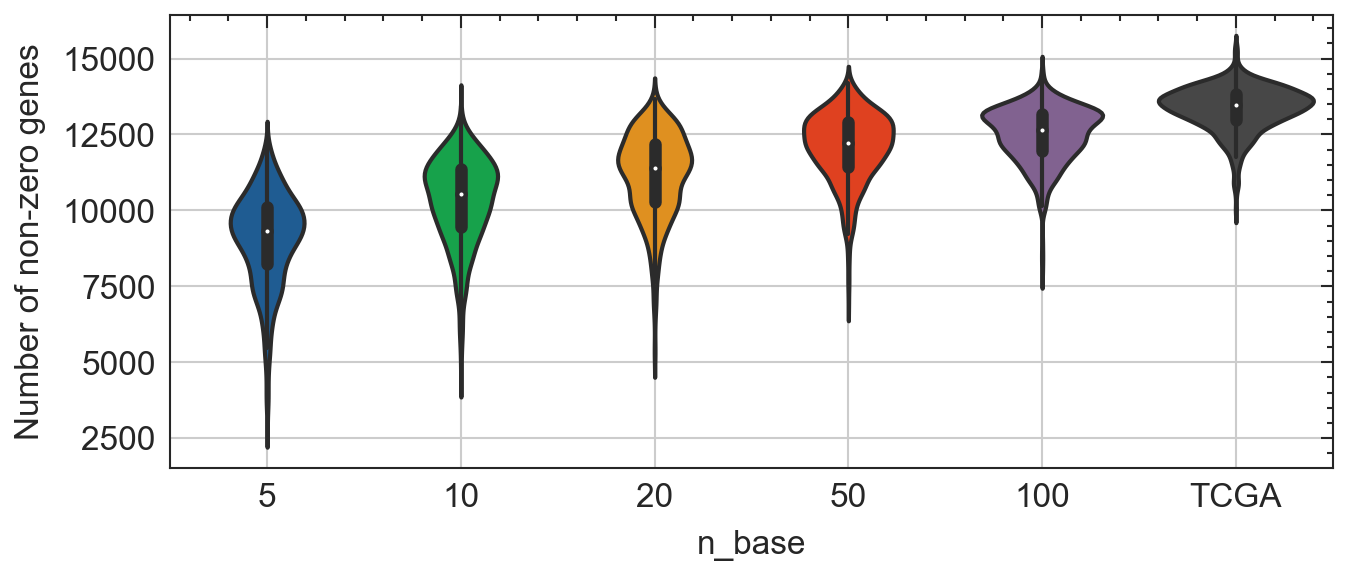

In [22]:
fig, ax = plt.subplots(figsize=(5, 2))
sns.violinplot(all_ds, x='n_base', y='Number of non-zero genes', ax=ax)
ax.grid()
plt.savefig('sparsity_sctGEP_vs_TCGA.svg', dpi=300)